# Analysis and Selection of ML model
**Can we predict the power generation for next couple of days? - this allows for better grid management**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# plant 1 - Power Generation data
gd = pd.read_csv('Plant_1_Generation_Data.csv')

# plant 1 - Weather Sensor data
ws = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

## Features to consider when choosing ML model
  1. Size of training data
  2. Accuracy and/or Interpretability of the output
  3. Speed or Training time
  4. Linearity
  5. Number of features

If we where to only consider the **size of the data**, then we se that the data is not too large,
and we should focus on choosing a algorithm with high bias and low variance, like **Linear regression**

In [3]:
# take a look at the size of the data
print(gd.shape)
print(ws.shape)

(68778, 7)
(3182, 6)


Our next consideration is **Accuracy (and/or) Interpretabilty**.

Accuracy of a model means that the function predicts a response value for a given observation,
which is close to the true response value for that observation.

While a more interpretable model one can easily understand how any individual predictor is associated with the response.

If **inference** is the goal, then restrictive models (like **Linear / Logistic regression**) are better as they are much more interpretable.

In our case we are predicting power generation for the coming few days.
Now if our goal is better grid management, then we would
to choose a more accurate model, over a interpretable one. (Like **SVM** or **Random Forest**)


In [4]:
# accuracy and(/or) Interpretation of the data

# take a look at the features of each data set
print(gd.columns)
print(ws.columns)

# and take a look at the first few rows, in each data set
print(gd.head())
print(ws.head())

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')
Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe          


Our next consideration is **Speed or Training Time**.
Accuracy often involved longer training time. If we would go for a more accurate model such as
SVM, then our training time would be noticeably larger then if we where to choose an algorithm like 
linear regression.

In our case we would not be affected that much of choosing a more accurate model since our data is not to large.

Our next consideration is **Linearity**.
Algorithms such as logistic regression and SVM work on the assumption that the classes
can be separated by a straight line (or its higher-dimensional analog).

We need to check for linearity before going for a accurate model such as 
Linear/Logistic Regression or a more interpretable one like SVM, in which both can suffer to linearity.

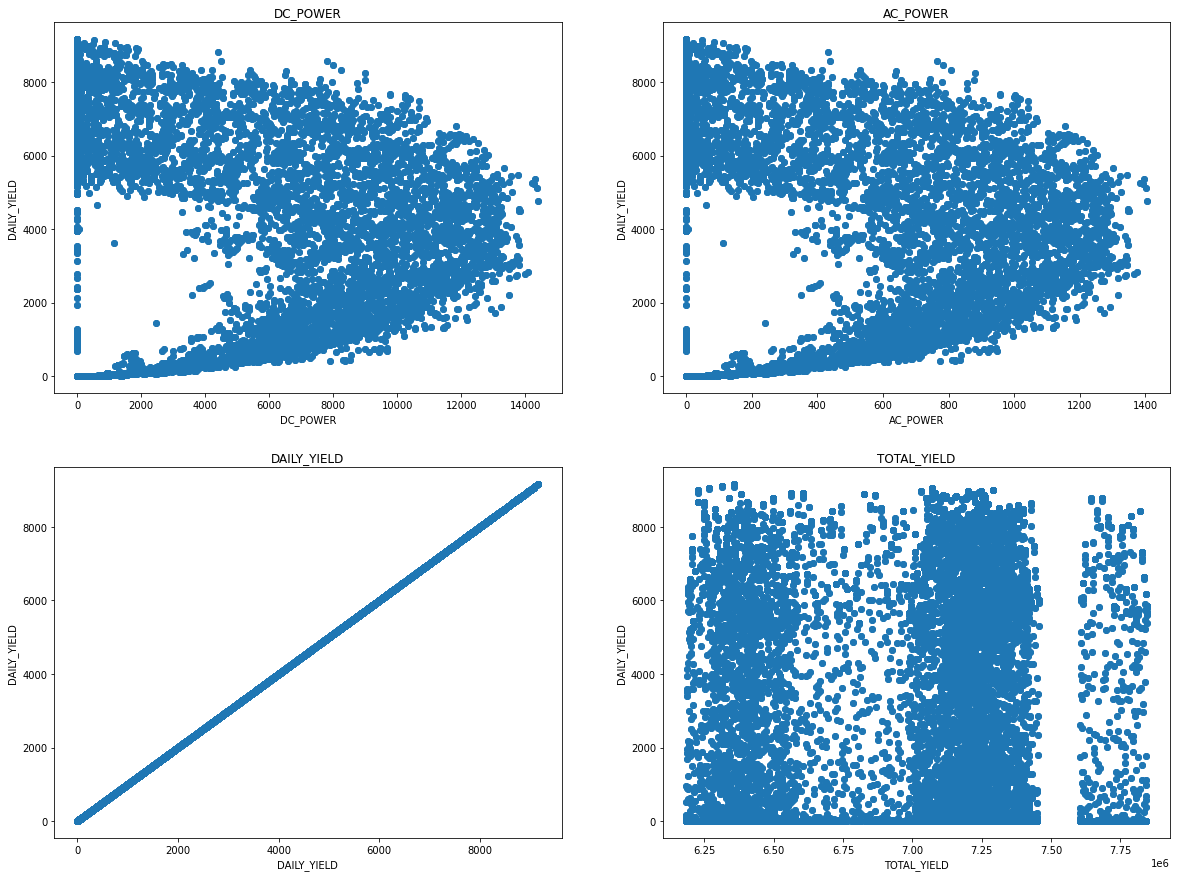

In [38]:
# check for linearity in both data sets by plotting the data, 
# and fitting a linear line and checking for residual error.

# 'DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'
%matplotlib inline

# create a figure with a subplot for each feature in the data set
features = gd.columns[3:]

# create a figure with 4 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

sample_data = gd.sample(frac=.2, random_state=1)


# fit a linear line to the data and plot it
for i, feature in enumerate(features):
	axes[i // 2, i % 2].scatter(sample_data[feature], sample_data['DAILY_YIELD'])
	axes[i // 2, i % 2].set_title(feature)
	axes[i // 2, i % 2].set_xlabel(feature)
	axes[i // 2, i % 2].set_ylabel('DAILY_YIELD')
	axes[i // 2, i % 2].plot(sample_data[feature], sample_data['DAILY_YIELD'], 'o')
		



Our next and last consideration is **Number of features**.
If our datasets have a lot of features, that may not all be relevant and significant,
then they may bog down some learning algorithms and make the training time unfeasibly long.
In these cases algorithms such as SVM would be the best fit, but luckily we only have 6-7 features in each
dataset and therefore dont need to concern ourself with that. 

## Conclusion
